## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.initializers import he_normal
from keras.models import Sequential 
from keras.layers import Dense, Activation

C:\Users\Dileep\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [9]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [10]:
X_train.shape

(60000, 784)

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
Y_train.shape

(60000, 10)

In [15]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

<h1> Two hidden Layers 784-364-54-10  </h1>

<h2> MLP + ReLU + ADAM </h2>

In [20]:
model_relu = Sequential()
model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(54, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.2663 - acc: 0.9223 - val_loss: 0.1246 - val_acc: 0.9622
Epoch 2/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0992 - acc: 0.9701 - val_loss: 0.0923 - val_acc: 0.9719
Epoch 3/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0659 - acc: 0.9797 - val_loss: 0.0750 - val_acc: 0.9747
Epoch 4/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0469 - acc: 0.9853 - val_loss: 0.0807 - val_acc: 0.9741
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0360 - acc: 0.9887 - val_loss: 0.0682 - val_acc: 0.9770
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0268 - acc: 0.9910 - val_loss: 0.0771 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0196 - acc: 0.9939 - val_loss: 0.0702 - va

Test score: 0.0947500508010904
Test accuracy: 0.9802


<IPython.core.display.Javascript object>


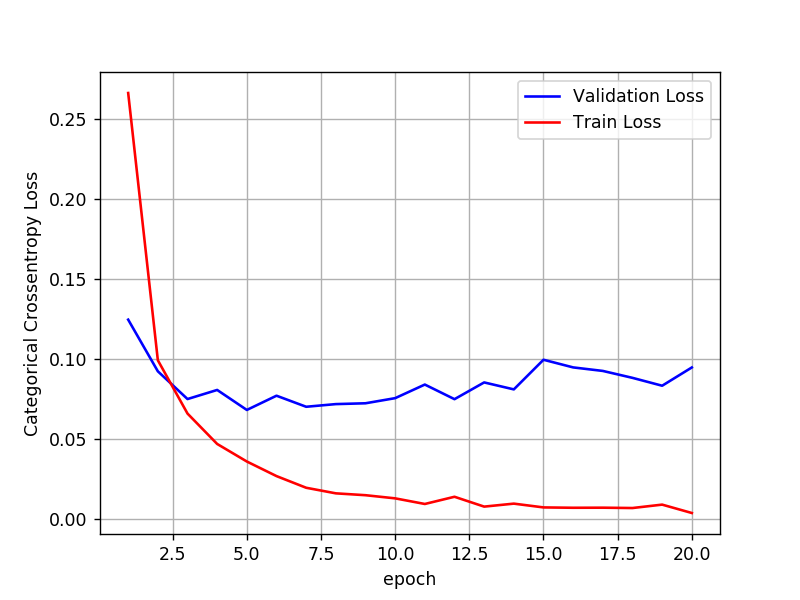

In [21]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


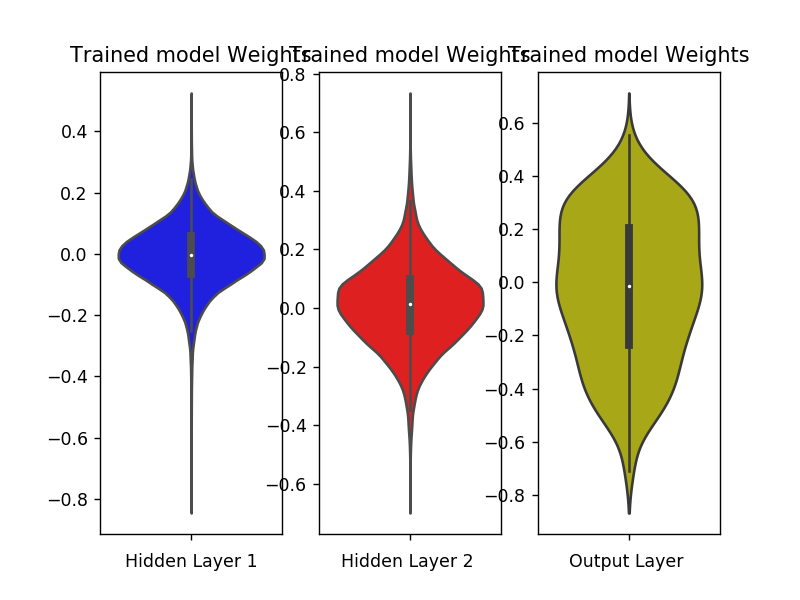

In [22]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [39]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(54, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_9 (Batch (None, 364)               1456      
_________________________________________________________________
dense_24 (Dense)             (None, 54)                19710     
_________________________________________________________________
batch_normalization_10 (Batc (None, 54)                216       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                550       
Total params: 307,672
Trainable params: 306,836
Non-trainable params: 836
_________________________________________________________________


In [40]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.2205 - acc: 0.9357 - val_loss: 0.1062 - val_acc: 0.9666
Epoch 2/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0817 - acc: 0.9764 - val_loss: 0.0957 - val_acc: 0.9713
Epoch 3/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0841 - val_acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0366 - acc: 0.9889 - val_loss: 0.0794 - val_acc: 0.9764
Epoch 5/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0272 - acc: 0.9917 - val_loss: 0.0776 - val_acc: 0.9758
Epoch 6/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0235 - acc: 0.9930 - val_loss: 0.0747 - val_acc: 0.9787
Epoch 7/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.0195 - acc: 0.9940 - val_loss: 0.0918 -

Test score: 0.08005559615891034
Test accuracy: 0.9818


<IPython.core.display.Javascript object>


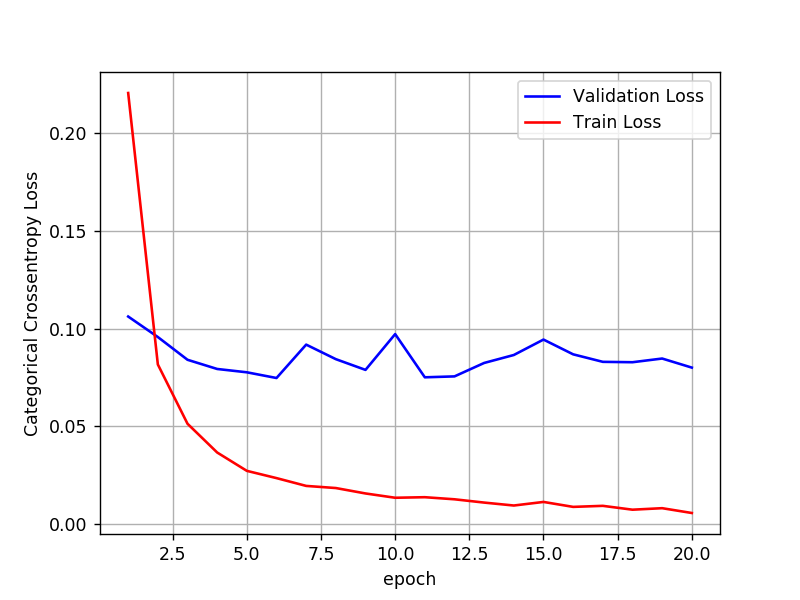

In [41]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


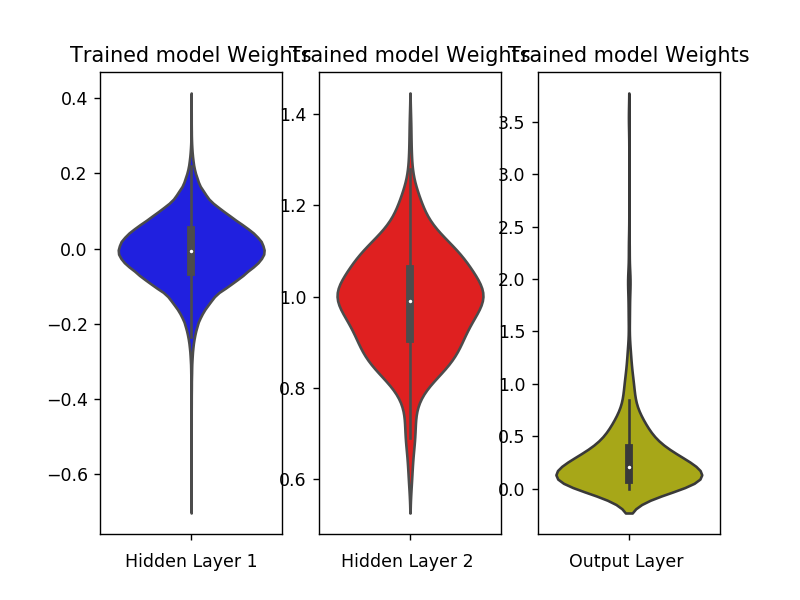

In [42]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>  MLP + Dropout + AdamOptimizer+Batch Normalization </h2>

In [32]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(54, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_7 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_3 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 54)                19710     
_________________________________________________________________
batch_normalization_8 (Batch (None, 54)                216       
_________________________________________________________________
dropout_4 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                550       
Total para

In [36]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.0709 - acc: 0.9789 - val_loss: 0.0625 - val_acc: 0.9823
Epoch 2/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.0715 - acc: 0.9790 - val_loss: 0.0628 - val_acc: 0.9830
Epoch 3/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0672 - acc: 0.9800 - val_loss: 0.0629 - val_acc: 0.9830
Epoch 4/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.0653 - acc: 0.9802 - val_loss: 0.0600 - val_acc: 0.9835
Epoch 5/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0640 - acc: 0.9807 - val_loss: 0.0624 - val_acc: 0.9813
Epoch 6/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0627 - acc: 0.9807 - val_loss: 0.0645 - val_acc: 0.9811
Epoch 7/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0624 - acc: 0.9811 - val_loss: 0.0644 -

Test score: 0.06466308390297999
Test accuracy: 0.983


<IPython.core.display.Javascript object>


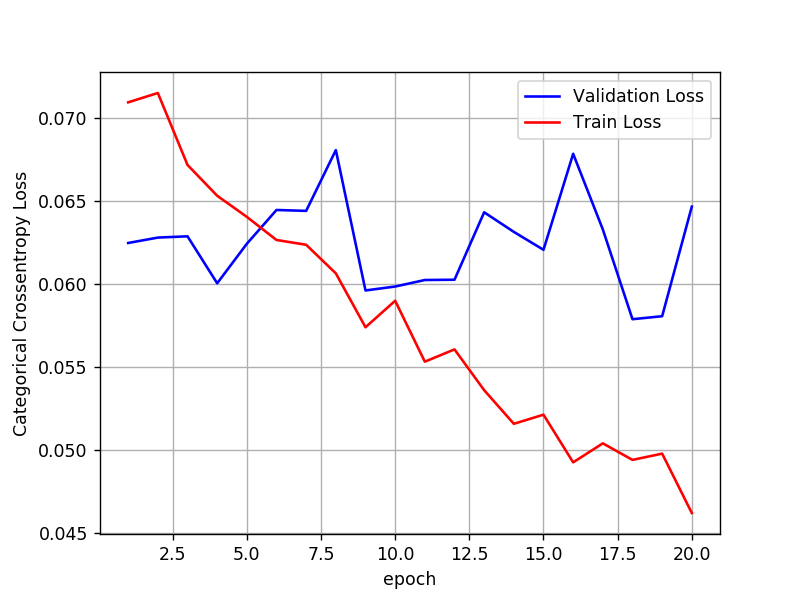

In [37]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


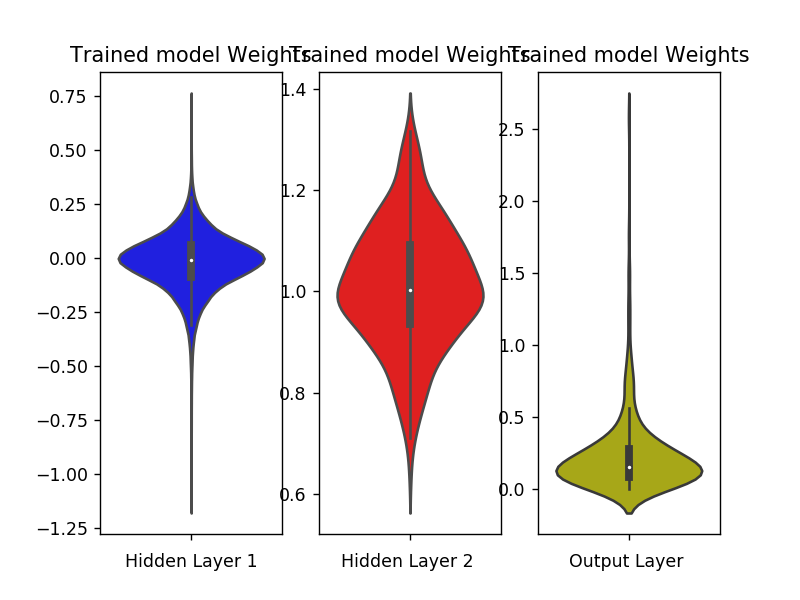

In [38]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> Three hidden Layers 784-512-300-128-10  </h1>


<h2> MLP + ReLU + ADAM </h2>

In [43]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(300, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.2188 - acc: 0.9348 - val_loss: 0.1042 - val_acc: 0.9696
Epoch 2/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0841 - acc: 0.9744 - val_loss: 0.0805 - val_acc: 0.9732
Epoch 3/20
60000/60000 [==============================] - 13s 208us/step - loss: 0.0532 - acc: 0.9831 - val_loss: 0.0678 - val_acc: 0.9787
Epoch 4/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.0370 - acc: 0.9880 - val_loss: 0.0730 - val_acc: 0.9779
Epoch 5/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.0297 - acc: 0.9901 - val_loss: 0.0797 - val_acc: 0.9780
Epoch 6/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.0264 - acc: 0.9915 - val_loss: 0.0821 - val_acc: 0.9770
Epoch 7/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0222 - acc: 0.9927 - val_loss: 0.

Test score: 0.08382805001379862
Test accuracy: 0.9814


<IPython.core.display.Javascript object>


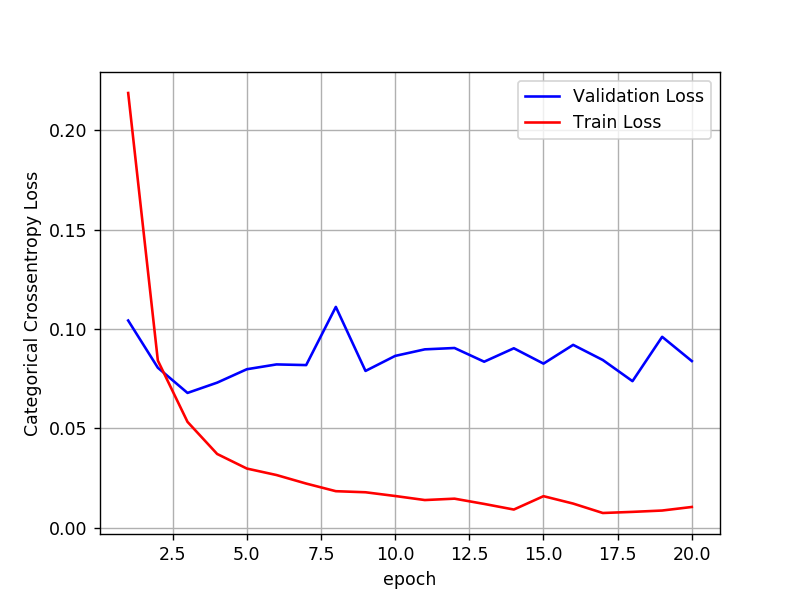

In [45]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


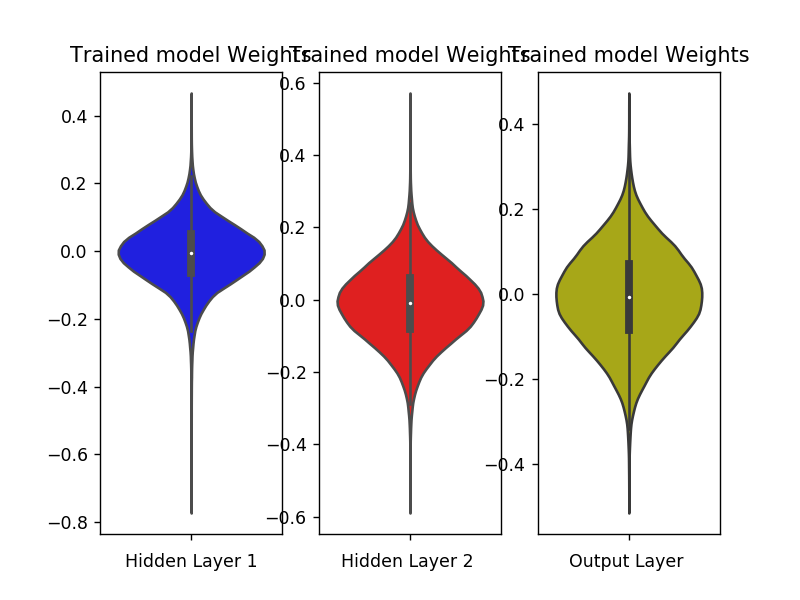

In [44]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [72]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(300, activation='relu',kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_28 (Batc (None, 512)               2048      
_________________________________________________________________
dense_63 (Dense)             (None, 300)               153900    
_________________________________________________________________
batch_normalization_29 (Batc (None, 300)               1200      
_________________________________________________________________
dense_64 (Dense)             (None, 128)               38528     
_________________________________________________________________
batch_normalization_30 (Batc (None, 128)               512       
_________________________________________________________________
dense_65 (Dense)             (None, 10)                1290      
Total para

In [73]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.1844 - acc: 0.9443 - val_loss: 0.0999 - val_acc: 0.9684
Epoch 2/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.0706 - acc: 0.9781 - val_loss: 0.0862 - val_acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0469 - acc: 0.9852 - val_loss: 0.0821 - val_acc: 0.9744
Epoch 4/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0360 - acc: 0.9880 - val_loss: 0.0828 - val_acc: 0.9753
Epoch 5/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0290 - acc: 0.9904 - val_loss: 0.1106 - val_acc: 0.9667
Epoch 6/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0241 - acc: 0.9923 - val_loss: 0.0888 - val_acc: 0.9737
Epoch 7/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.0231 - acc: 0.9925 - val_loss: 0.

Test score: 0.08161304351501239
Test accuracy: 0.9825


<IPython.core.display.Javascript object>


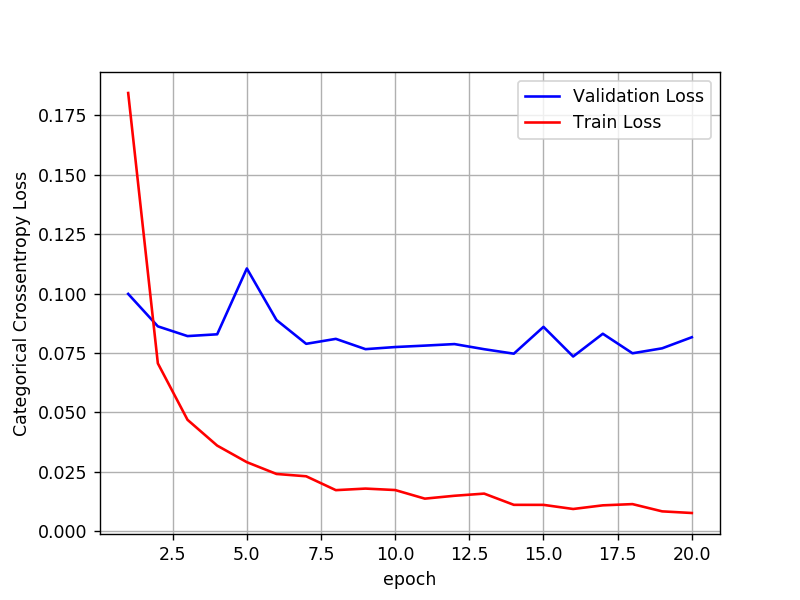

In [74]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


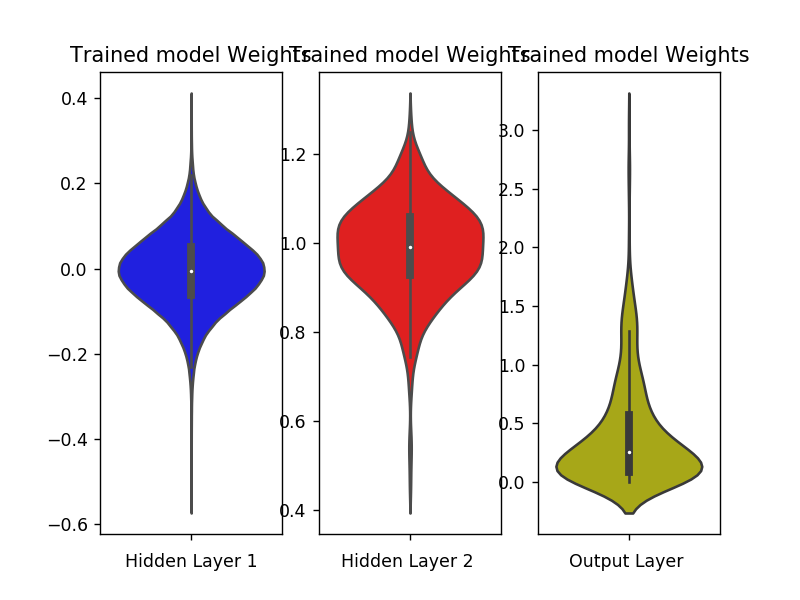

In [75]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>  MLP + Dropout + AdamOptimizer+Batch Normalization </h2>


In [52]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(300, activation='relu', kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 300)               153900    
_________________________________________________________________
batch_normalization_18 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_9 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               38528     
__________

In [53]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 316us/step - loss: 0.5536 - acc: 0.8325 - val_loss: 0.1589 - val_acc: 0.9491
Epoch 2/20
60000/60000 [==============================] - 16s 261us/step - loss: 0.2434 - acc: 0.9283 - val_loss: 0.1146 - val_acc: 0.9648
Epoch 3/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.1832 - acc: 0.9459 - val_loss: 0.0977 - val_acc: 0.9718
Epoch 4/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.1575 - acc: 0.9528 - val_loss: 0.0912 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.1384 - acc: 0.9589 - val_loss: 0.0780 - val_acc: 0.9760
Epoch 6/20
60000/60000 [==============================] - 16s 263us/step - loss: 0.1289 - acc: 0.9610 - val_loss: 0.0762 - val_acc: 0.9779
Epoch 7/20
60000/60000 [==============================] - 17s 280us/step - loss: 0.1162 - acc: 0.9649 - val_loss: 0.

Test score: 0.055662178127822697
Test accuracy: 0.9841


<IPython.core.display.Javascript object>


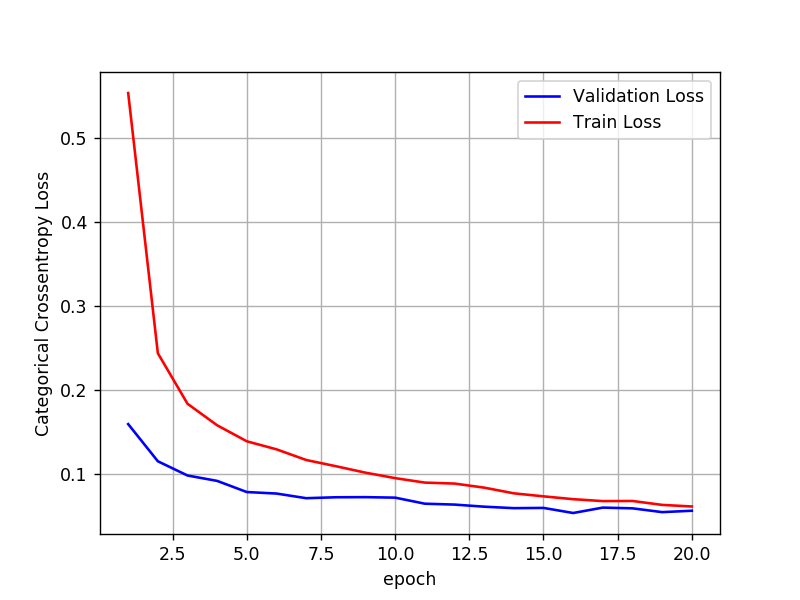

In [54]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


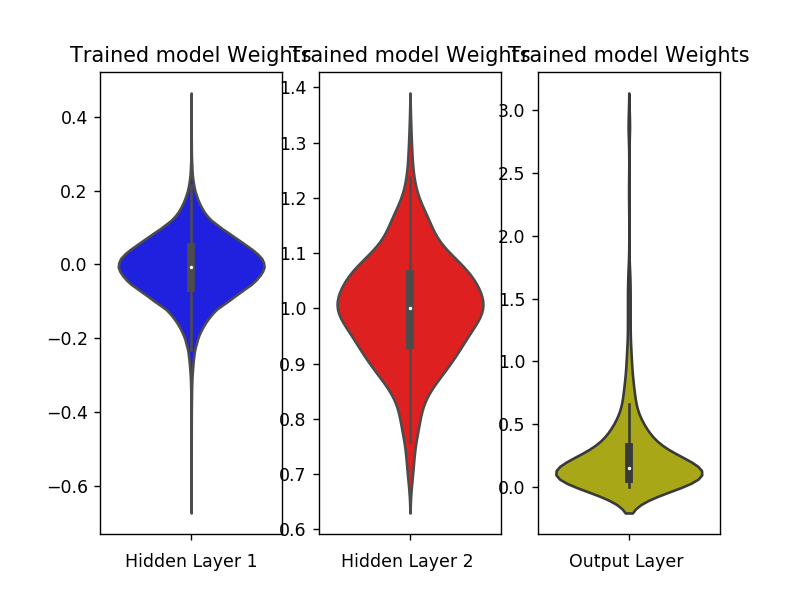

In [55]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1> five hidden Layers 784-600-400-128-54-10  </h1>

<h2> MLP + ReLU + ADAM </h2>

In [69]:
model_relu = Sequential()
model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(400, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(54, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.2221 - acc: 0.9328 - val_loss: 0.0978 - val_acc: 0.9705
Epoch 2/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.0817 - acc: 0.9754 - val_loss: 0.0832 - val_acc: 0.9745
Epoch 3/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0555 - acc: 0.9829 - val_loss: 0.0885 - val_acc: 0.9740
Epoch 4/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.0400 - acc: 0.9872 - val_loss: 0.0738 - val_acc: 0.9786
Epoch 5/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.0318 - acc: 0.9895 - val_loss: 0.0789 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.0262 - acc: 0.9912 - val_loss: 0.0839 - val_acc: 0.9794
Epoch 7/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0235 - acc: 0.9922 - val_loss: 0.

Test score: 0.08110259439407523
Test accuracy: 0.9824


<IPython.core.display.Javascript object>


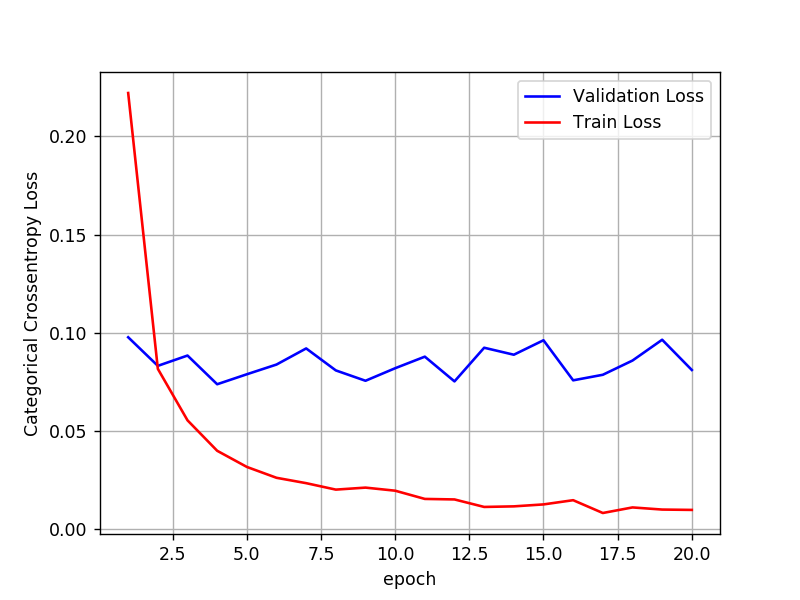

In [70]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


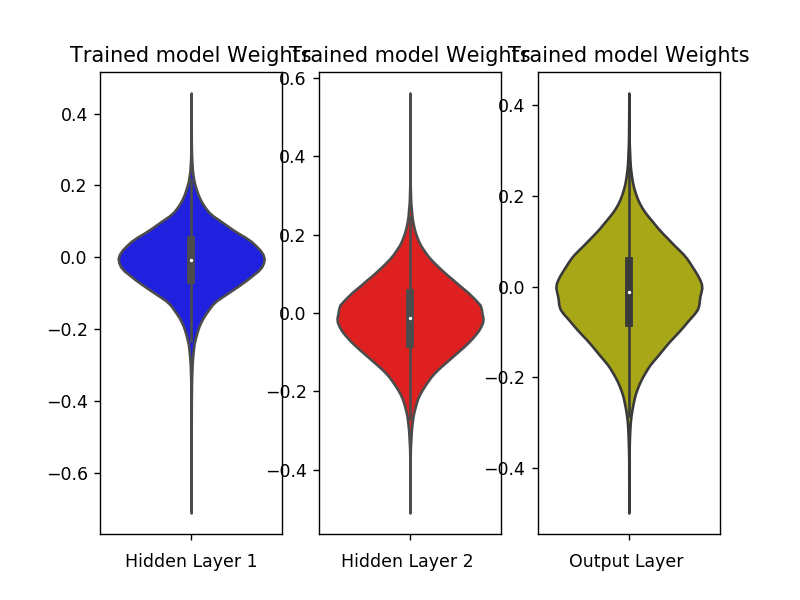

In [71]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [59]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(400, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(54, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_20 (Batc (None, 600)               2400      
_________________________________________________________________
dense_48 (Dense)             (None, 400)               240400    
_________________________________________________________________
batch_normalization_21 (Batc (None, 400)               1600      
_________________________________________________________________
dense_49 (Dense)             (None, 128)               51328     
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
dense_50 (Dense)             (None, 54)                6966      
__________

In [60]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 364us/step - loss: 0.2001 - acc: 0.9420 - val_loss: 0.0988 - val_acc: 0.9700
Epoch 2/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.0765 - acc: 0.9766 - val_loss: 0.0919 - val_acc: 0.9715
Epoch 3/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.0549 - acc: 0.9826 - val_loss: 0.0915 - val_acc: 0.9721
Epoch 4/20
60000/60000 [==============================] - 19s 311us/step - loss: 0.0420 - acc: 0.9863 - val_loss: 0.0790 - val_acc: 0.9735
Epoch 5/20
60000/60000 [==============================] - 18s 307us/step - loss: 0.0351 - acc: 0.9886 - val_loss: 0.0779 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 19s 314us/step - loss: 0.0284 - acc: 0.9904 - val_loss: 0.0837 - val_acc: 0.9763
Epoch 7/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.0252 - acc: 0.9915 - val_loss: 0.

Test score: 0.07698348320620571
Test accuracy: 0.9815


<IPython.core.display.Javascript object>


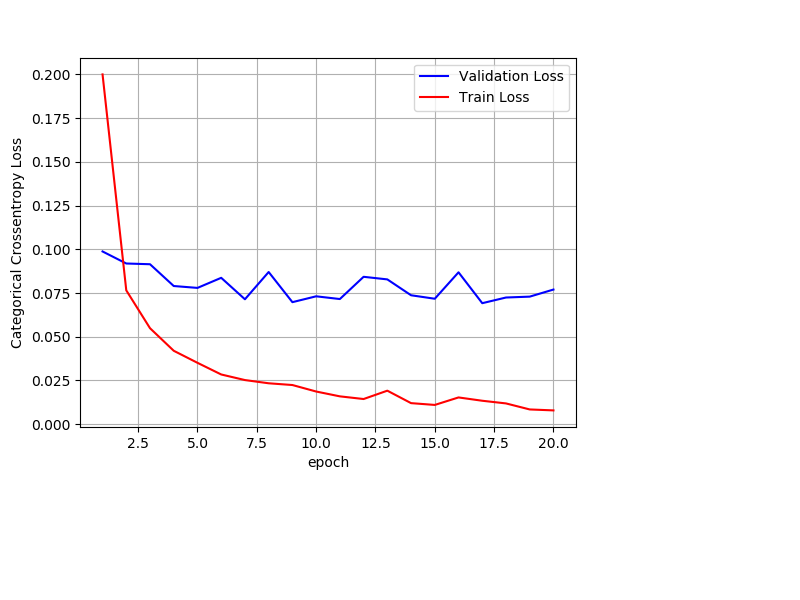

In [61]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


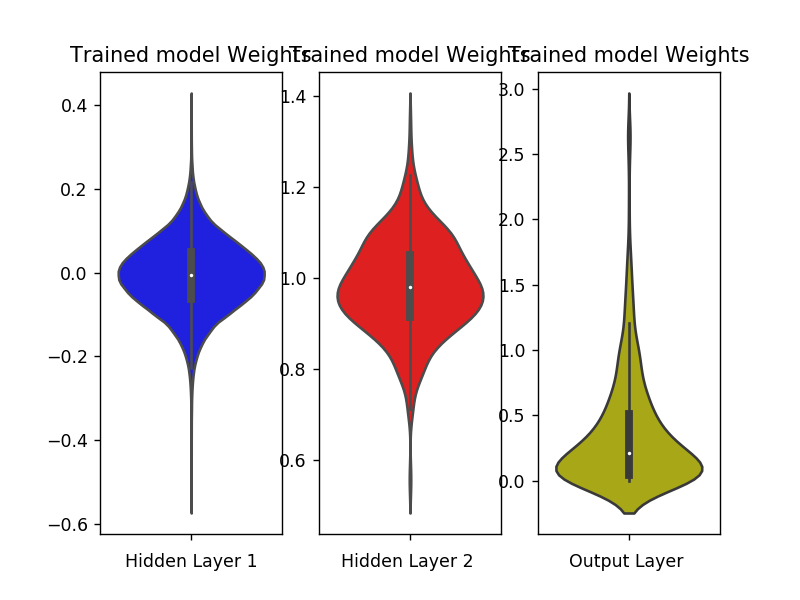

In [64]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>  MLP + Dropout + AdamOptimizer+Batch Normalization </h2>

In [65]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(400, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(54, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_24 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_11 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 400)               240400    
_________________________________________________________________
batch_normalization_25 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_12 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               51328     
__________

In [66]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 426us/step - loss: 0.8682 - acc: 0.7384 - val_loss: 0.1993 - val_acc: 0.9401
Epoch 2/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.3327 - acc: 0.9095 - val_loss: 0.1332 - val_acc: 0.9594
Epoch 3/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.2441 - acc: 0.9328 - val_loss: 0.1103 - val_acc: 0.9680
Epoch 4/20
60000/60000 [==============================] - 20s 340us/step - loss: 0.2045 - acc: 0.9456 - val_loss: 0.1074 - val_acc: 0.9686
Epoch 5/20
60000/60000 [==============================] - 20s 340us/step - loss: 0.1857 - acc: 0.9511 - val_loss: 0.0974 - val_acc: 0.9739
Epoch 6/20
60000/60000 [==============================] - 20s 334us/step - loss: 0.1587 - acc: 0.9578 - val_loss: 0.0903 - val_acc: 0.9757
Epoch 7/20
60000/60000 [==============================] - 20s 331us/step - loss: 0.1423 - acc: 0.9620 - val_loss: 0.

Test score: 0.06429675308761652
Test accuracy: 0.9842


<IPython.core.display.Javascript object>


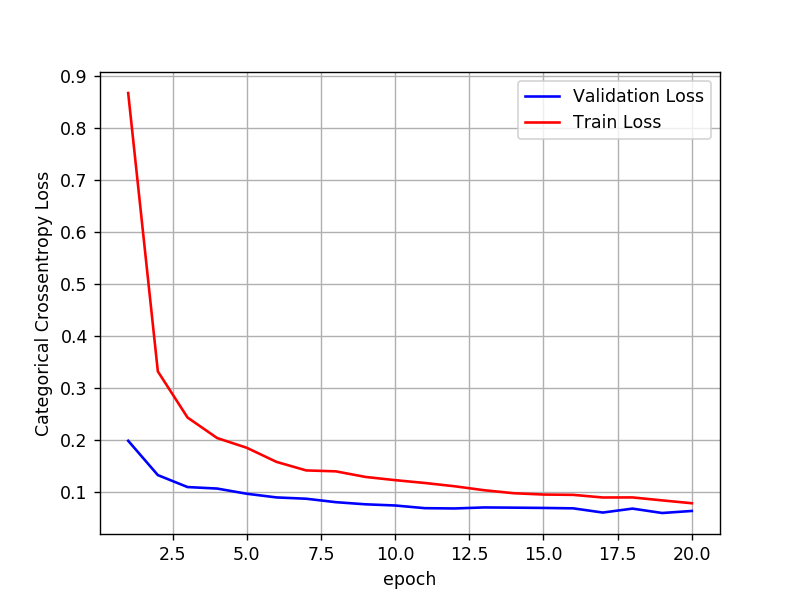

In [67]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


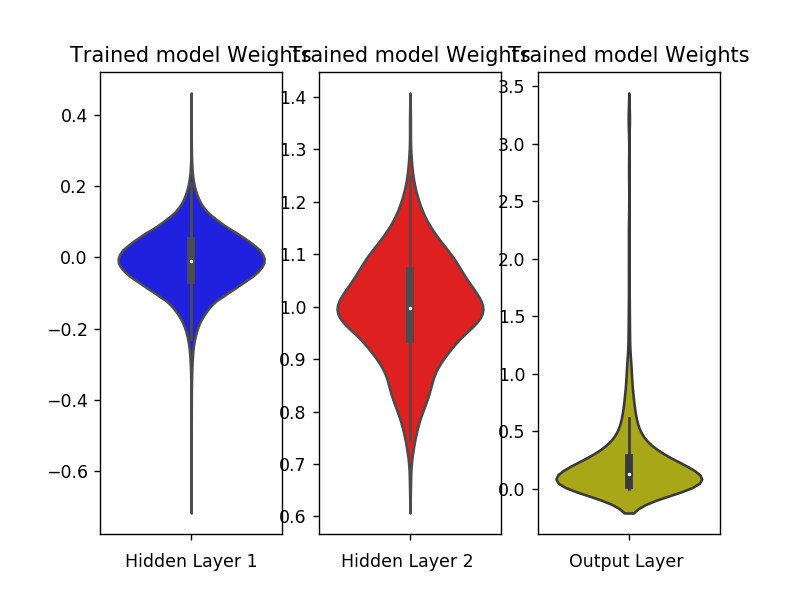

In [68]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Tables for Comparing MUltiple Architecures

## Table for Two hidden Layers 784-364-54-10

|type     |  Test score  | Test accuracy |
|--------------------------------|----------------------------|-----------------------------------|
|MLP + ReLU + ADAM| 0.0947500508010904 | 0.9802 |
|--------------------------------|----------------------------|-----------------------------------|
|MLP + Batch-Norm + Adam|0.08005559615891034|0.9818|
|--------------------------------|----------------------------|-----------------------------------|
|MLP + Dropout + Adamr+Batch Norm|0.06466308390297999|0.983|
|--------------------------------|----------------------------|-----------------------------------|

## Table for Three hidden Layers 784-512-300-128-10

|type     |  Test score  | Test accuracy |
|--------------------------------|----------------------------|-----------------------------------|
|MLP + ReLU + ADAM| 0.08382805001379862 | 0.9814 |
|--------------------------------|----------------------------|-----------------------------------|
|MLP + Batch-Norm + Adam|0.08161304351501239|0.9825|
|--------------------------------|----------------------------|-----------------------------------|
|MLP + Dropout + Adamr+Batch Norm|0.055662178127822697|0.9841|
|--------------------------------|----------------------------|-----------------------------------|

## five hidden Layers 784-600-400-128-54-10  


|type     |  Test score  | Test accuracy |
|--------------------------------|----------------------------|-----------------------------------|
|MLP + ReLU + ADAM| 0.08110259439407523 | 0.9824 |
|--------------------------------|----------------------------|-----------------------------------|
|MLP + Batch-Norm + Adam|0.07698348320620571|0.9815|
|--------------------------------|----------------------------|-----------------------------------|
|MLP + Dropout + Adamr+Batch Norm|0.06429675308761652|0.9842|
|--------------------------------|----------------------------|-----------------------------------|

# Conclusion

1. As Number of Hidden layers increases Test Accuracy Increases slightly

2. As Number of Hidden Layers increases Test Score also Decreases

3. highest Test accuracy is For Five Hidden Layers with Drop outs and Batch Normalization is 0.9842

3. lowest Test loss is For three Hidden Layers with Drop outs and Batch Normalization is 0.055662178127822697

4. as we apply Drop Outs and Batch Normalization our Model works Better when compared to Simple MLP